In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\krishna\\Downloads\\parkinsons2.csv')
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [3]:
x=df.iloc[:,:-1].values

In [4]:
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1_train=ss.fit_transform(x_train)
x1_test=ss.transform(x_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import *

In [13]:
from numpy import sqrt

In [26]:
rmse=[]
for k in range(10):
    k=k+1
    knn=KNeighborsClassifier(k)
    knn.fit(x1_train,y_train)
    pred=knn.predict(x1_test)
    error=sqrt(mean_squared_error(y_test,pred))
    rmse.append(error)
    print('rmse for k=',k,'is',error)
    

rmse for k= 1 is 0.24743582965269675
rmse for k= 2 is 0.2857142857142857
rmse for k= 3 is 0.24743582965269675
rmse for k= 4 is 0.2857142857142857
rmse for k= 5 is 0.2857142857142857
rmse for k= 6 is 0.24743582965269675
rmse for k= 7 is 0.2857142857142857
rmse for k= 8 is 0.2857142857142857
rmse for k= 9 is 0.2857142857142857
rmse for k= 10 is 0.24743582965269675


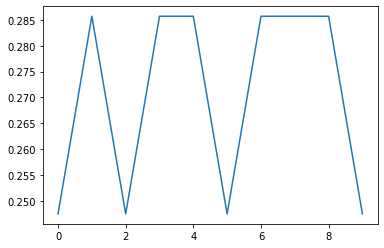

In [27]:
curve=pd.DataFrame(rmse)
plt.plot(curve)
plt.show()

In [30]:
knn1=KNeighborsClassifier(3)
knn1.fit(x1_train,y_train)
pred1=knn1.predict(x1_test)
pred1

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1], dtype=int64)

In [31]:
confuse=confusion_matrix(y_test,pred1)
confuse

array([[11,  0],
       [ 3, 35]], dtype=int64)

In [33]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.92      0.96        38

    accuracy                           0.94        49
   macro avg       0.89      0.96      0.92        49
weighted avg       0.95      0.94      0.94        49

